# **Introducción**


El diseño de un intercambiador de calor y de un sistema de refrigeración son dos aspectos fundamentales en la ingeniería mecánica que desempeñan un papel crucial en una amplia variedad de aplicaciones industriales y comerciales. Estos componentes son esenciales para controlar y gestionar las temperaturas en diferentes procesos y sistemas, garantizando un rendimiento eficiente y seguro.

Un intercambiador de calor es un dispositivo diseñado para transferir calor de un fluido a otro, sin que estos dos fluidos se mezclen entre sí. Este proceso se logra mediante superficies de transferencia de calor, que pueden ser placas, tubos o aletas, que permiten el intercambio de energía térmica entre los fluidos. Los intercambiadores de calor se utilizan en una variedad de aplicaciones, desde sistemas de climatización hasta procesos de fabricación industrial, donde la regulación de la temperatura es crítica.

Por otro lado, el diseño de un sistema de refrigeración implica la creación de un sistema completo que utiliza un ciclo termodinámico para eliminar el calor de un espacio o de un sistema. Este proceso se logra mediante la compresión, expansión y circulación de un refrigerante que absorbe y libera calor en un ciclo continuo. Los sistemas de refrigeración son vitales en aplicaciones como la refrigeración de alimentos, la climatización de edificios, la refrigeración de equipos electrónicos y la refrigeración industrial.

Ambos conceptos están estrechamente relacionados, ya que los intercambiadores de calor son componentes clave en los sistemas de refrigeración, permitiendo la transferencia de calor entre el refrigerante y el entorno que se desea enfriar. En este contexto, los ingenieros mecánicos desempeñan un papel fundamental al diseñar intercambiadores de calor eficientes y sistemas de refrigeración que cumplan con los requisitos de rendimiento, eficiencia energética y seguridad.

En este papel de ingeniero mecánico, exploraremos en detalle los principios de diseño de intercambiadores de calor y sistemas de refrigeración, así como las consideraciones clave en la ingeniería de estos sistemas para lograr un rendimiento óptimo y un uso eficiente de los recursos.

# **Enunciado**

Requerimiento: Enfriar leche para almacenamiento.

1. Especificación cuantitativa de requerimiento:

    1.1 Requerimiento funcionales. 
        
        - $m_l=0.5Kg/s$ 
        - Enfriar desde 80 ºC hasta 10 ºC
        - Se dispone de $m_w=2.5kg/s$ agua proveniente de una torre a 24ºC.

    1.2 Requerimiento no funcionales.

        - Operable y seguro.
        - Costo mínimo.

2. Concepto de diseño:

    2.1 Solo enfriamiento con agua.

    2.2 Solo enfriamiento con un sistema de refrigeración.
    
    2.3 Sistema combinado.

        - Agua primero por SR.
        - Agua primero por pre-enfriador.


#  Diseño solo Intercambiador de calor

El sistema en si mismo no puede realizarse con solo un intercambiador de calor dado que los perfiles de temperatura producirían un proceso imposible en la medida que el fluido frio (Agua) estaría a una temperatura superior a la entrada en comparación a la temperatura del fluido caliente (leche).

<p align="center">
  <img src="maxresdefault.jpg" height ="400px">
</p>

<p align="center">
  <img src="./imgs_leche/diagrama_solo_intercambioador.jpeg" height ="400px">
</p>



# **Diseño combinado**

## **Carcasa y tubo**

### Importar librerías necesarias

Para el desarrollo del diseño y la optimización los costos del intercambiador de calor como del sistema de refrigerador se utilizo el lenguaje de programación Python en su version 3.10.13 y las siguientes librerías.

1. PyFluids: Obtener las propiedades del agua a las condiciones termo-físicas necesarias.
2. Numpy: Manipular el vector de temperaturas, asi como de la optimización de las operaciones y cálculos necesarios.
3. Scipy: Encontrar la función que mejor estime los datos de costos.
4. Matplotlib: Modelar los resultados obtenidos. 

In [2]:
from pyfluids import Fluid, FluidsList, Input
import numpy as np
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

### Nomenclatura

- 

### Establecer valores conocidos

In [3]:
caudal_leche                              = 0.5 # kg/s
temperatura_entrada_leche                 = 80 # ºC
temperatura_salida_leche                  = 10 # ºC
temperatura_entrada_agua                  = 24 # ºC
caudal_agua                               = 2.5 # kg/s

### Definición de salida temperatura

Se debe parametrizar la velocidad de salida del intercambiador y la entrada del sistema del refrigerador.

<p align="center">
  <img src="./imgs_leche/esquema_flujo.jpeg" height ="350px">
</p>


In [4]:
temperaturas_leche_estimada_salidas = np.linspace(35, 65, 20)
temperaturas_leche_estimada_salidas

array([35.        , 36.57894737, 38.15789474, 39.73684211, 41.31578947,
       42.89473684, 44.47368421, 46.05263158, 47.63157895, 49.21052632,
       50.78947368, 52.36842105, 53.94736842, 55.52631579, 57.10526316,
       58.68421053, 60.26315789, 61.84210526, 63.42105263, 65.        ])

### Establecer valores pre-diseño

#### Consideraciones

<!-- [presión agua](https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra.) -->


- Considere como material el acero inoxidable, k = 15 W/m*k.
- Diámetro de tubo de 3/4 in ( 19 mm exterior y 16 mm interior ).
- Longitud de 4m.

In [5]:
k_material                            = 15    # W/ m * k Acero inoxidable
diametro_interior                     = 17e-3 # m
diametro_exterior                     = 25.4e-3 # m

longitud                              = 4 #m               

In [6]:
water = Fluid(FluidsList.Water)
water.name

Water

In [7]:
presion_agua  = (2) * 101_325 # Pa

#### Composición de la leche

In [8]:
cp_propiedades_leche = 3970  # J/kg k
print(f"Calor especifico leche {cp_propiedades_leche} J/(kg*k)")

Calor especifico leche 3970 J/(kg*k)


In [9]:
temperaturas_propiedades_leche = (temperaturas_leche_estimada_salidas + temperatura_entrada_leche) / 2
print(f"Temperaturas de propiedades a iterar {temperaturas_propiedades_leche} ºC")

Temperaturas de propiedades a iterar [57.5        58.28947368 59.07894737 59.86842105 60.65789474 61.44736842
 62.23684211 63.02631579 63.81578947 64.60526316 65.39473684 66.18421053
 66.97368421 67.76315789 68.55263158 69.34210526 70.13157895 70.92105263
 71.71052632 72.5       ] ºC


### Termodinámica

$$ \dot{Q} = (\dot{m} *C_{p})_{leche} * (T_{l1} -T_{l2})$$

Se calcula los calores disipados de la leche en el intercambiador a partir del vector de temperaturas.

In [10]:
calores_transferencia = caudal_leche * cp_propiedades_leche * (temperatura_entrada_leche - temperaturas_leche_estimada_salidas)
print(fr" Calores {calores_transferencia} W")

 Calores [89325.         86190.78947368 83056.57894737 79922.36842105
 76788.15789474 73653.94736842 70519.73684211 67385.52631579
 64251.31578947 61117.10526316 57982.89473684 54848.68421053
 51714.47368421 48580.26315789 45446.05263158 42311.84210526
 39177.63157895 36043.42105263 32909.21052632 29775.        ] W


In [11]:
estado_agua_propiedades = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(34),
)
print(estado_agua_propiedades.as_dict())

{'compressibility': 0.0014376012709739205, 'conductivity': 0.6203366408703609, 'critical_pressure': 22064000.0, 'critical_temperature': 373.946, 'density': 994.417937160409, 'dynamic_viscosity': 0.0007337301352239351, 'enthalpy': 142631.9153801642, 'entropy': 491.47808690964223, 'fraction': 100, 'freezing_temperature': None, 'internal_energy': 142428.1278251999, 'kinematic_viscosity': 7.378488538924831e-07, 'max_pressure': 1000000000.0, 'max_temperature': 1726.85, 'min_pressure': 611.6548008968684, 'min_temperature': 0.010000000000047748, 'molar_mass': 0.018015268, 'name': Water, 'phase': Liquid, 'prandtl': 4.942945501085879, 'pressure': 202650, 'quality': None, 'sound_speed': 1518.0155752419128, 'specific_heat': 4179.043576032273, 'specific_volume': 0.0010056133971753675, 'surface_tension': None, 'temperature': 34.0, 'triple_pressure': 611.6548008968684, 'triple_temperature': 0.010000000000047748, 'units_system': SIWithCelsiusAndPercents}


In [12]:
cp_agua                         = estado_agua_propiedades.specific_heat # J /kg k
viscosidad_dinamica_agua        = estado_agua_propiedades.dynamic_viscosity # Pa * s
densidad_agua                   = estado_agua_propiedades.density # kg / m3
k_agua                          = estado_agua_propiedades.conductivity # W / m k
prandl_agua                     = estado_agua_propiedades.prandtl

$$ \dot{Q} = (\dot{m} *C_{p})_{agua} * (T_{w2} - T_{w1})$$


$$ T_{w2} = \frac{\dot{Q}}{(\dot{m} * C_{p})_{agua}}  + T_{w1}$$

In [13]:
temperaturas_salida_agua = temperatura_entrada_agua + calores_transferencia / (caudal_agua * cp_agua)
print(fr"Temperatura salida del agua {temperaturas_salida_agua} ºC")

Temperatura salida del agua [32.54980317 32.24981007 31.94981698 31.64982389 31.34983079 31.0498377
 30.74984461 30.44985151 30.14985842 29.84986532 29.54987223 29.24987914
 28.94988604 28.64989295 28.34989986 28.04990676 27.74991367 27.44992058
 27.14992748 26.84993439] ºC


### Transferencia de calor

#### Cálculo de una U estimada

Asuma los coeficiente de trasferencia de calor

$$ \frac{1}{U_{ensuciamiento}} = \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + \frac{r_{0}}{r_{1}}*R_{f_{}i} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} + R_{f_{}o} + \frac{1}{h_{0}} $$



$$ \frac{1}{U_{limpio}} = \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} + \frac{1}{h_{0}}$$

En este caso

> $r_{0}$ -> radio exterior

> $r_{i}$ -> radio interior

> $h_{0}$ -> coeficiente de convección en la carcasa

> $h_{i}$ -> coeficiente de convección en el tubo

In [14]:
h_agua        = 5000     # kj/kg * k
h_leche       = 2000     # kj/kg * k

R_f_leche    = 0.000176 # m2 k/w
R_f_agua     = 0.000176 # m2 k/w

In [15]:
U_ensuciamiento = (
    + (diametro_exterior / diametro_interior) * 1 / h_leche
    + (diametro_exterior / diametro_interior) * R_f_leche
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + R_f_agua
    + 1 / h_agua
) ** -1 
U_ensuciamiento

579.3774539265527

In [16]:
U_no_ensuciamiento = (
    + (diametro_exterior / diametro_interior) * 1 / h_leche
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + 1 / h_agua
) ** -1 
U_no_ensuciamiento

776.9851852349087

#### Cálculo de la diferencia media logarítmica

$$ \Delta{T_{lm,cf}} = \frac{\Delta{T_{1} - \Delta{T_{2}}}}{ \ln{\frac{\Delta{T_{1}}}{\Delta{T_{2}}}} } $$


Donde

- $\Delta{T_{1}} = T_{l1} -  T_{w2}$ 
- $\Delta{T_{2}} = T_{l2} -  T_{w1}$ 

In [21]:
diferencia_temperatura_x1 = temperatura_entrada_leche - temperaturas_salida_agua
diferencia_temperatura_x2 = temperaturas_leche_estimada_salidas - temperatura_entrada_agua
diferencia_log_temperatura = (diferencia_temperatura_x2 - diferencia_temperatura_x1)/ np.log(diferencia_temperatura_x2/diferencia_temperatura_x1)

In [28]:
tabla_temperaturas = pd.DataFrame(
    {
        "Tl1 ºC": temperatura_entrada_leche,
        "Tw2 ºC": temperaturas_salida_agua,
        'Delta x1 ºC' :diferencia_temperatura_x1,
        "Tl2 ºC": temperaturas_leche_estimada_salidas,
        "Tw1 ºC": temperatura_entrada_agua,
        'Delta x2 ºC' :diferencia_temperatura_x2,
        'Diferencia media logarítmica ºC' : diferencia_log_temperatura,
    }
)


Index(['Tl1 ºC', 'Tw2 ºC', 'Delta x1 ºC', 'Tl2 ºC', 'Tw1 ºC', 'Delta x2 ºC',
       'Diferencia media logarítmica'],
      dtype='object')

Para el calculo de las el factor de corrección se uso las tablas del método de LMTD del moodle.

In [38]:
tabla_temperaturas['R'] = (tabla_temperaturas['Tl1 ºC'] - tabla_temperaturas['Tl2 ºC']) / (tabla_temperaturas['Tw2 ºC'] - tabla_temperaturas['Tw1 ºC'] )
tabla_temperaturas['P'] = 1 / tabla_temperaturas['R'] 

Teniendo en cuenta las gráficas de moodle

In [33]:
F = 0.8

In [39]:
diferencia_log_temperatura_corregida = diferencia_log_temperatura * F
tabla_temperaturas['Diferencia media logarítmica corregida ºC'] = diferencia_log_temperatura_corregida

|    |   Tl1 |     Tw2 |   diferencia x1 |     Tl2 |   Tw1 |   diferencia x2 |   diferencia media logarítmica |
|---:|------:|--------:|----------------:|--------:|------:|----------------:|-------------------------------:|
|  0 |    80 | 32.5498 |         47.4502 | 35      |    24 |         11      |                        24.9354 |
|  1 |    80 | 32.2498 |         47.7502 | 36.5789 |    24 |         12.5789 |                        26.3661 |
|  2 |    80 | 31.9498 |         48.0502 | 38.1579 |    24 |         14.1579 |                        27.7357 |
|  3 |    80 | 31.6498 |         48.3502 | 39.7368 |    24 |         15.7368 |                        29.0551 |
|  4 |    80 | 31.3498 |         48.6502 | 41.3158 |    24 |         17.3158 |                        30.3323 |
|  5 |    80 | 31.0498 |         48.9502 | 42.8947 |    24 |         18.8947 |                        31.5735 |
|  6 |    80 | 30.7498 |         49.2502 | 44.4737 |    24 |         20.4737 |                        32.7835 |
|  7 |    80 | 30.4499 |         49.5501 | 46.0526 |    24 |         22.0526 |                        33.9663 |
|  8 |    80 | 30.1499 |         49.8501 | 47.6316 |    24 |         23.6316 |                        35.1249 |
|  9 |    80 | 29.8499 |         50.1501 | 49.2105 |    24 |         25.2105 |                        36.2621 |
| 10 |    80 | 29.5499 |         50.4501 | 50.7895 |    24 |         26.7895 |                        37.38   |
| 11 |    80 | 29.2499 |         50.7501 | 52.3684 |    24 |         28.3684 |                        38.4805 |
| 12 |    80 | 28.9499 |         51.0501 | 53.9474 |    24 |         29.9474 |                        39.5652 |
| 13 |    80 | 28.6499 |         51.3501 | 55.5263 |    24 |         31.5263 |                        40.6355 |
| 14 |    80 | 28.3499 |         51.6501 | 57.1053 |    24 |         33.1053 |                        41.6925 |
| 15 |    80 | 28.0499 |         51.9501 | 58.6842 |    24 |         34.6842 |                        42.7374 |
| 16 |    80 | 27.7499 |         52.2501 | 60.2632 |    24 |         36.2632 |                        43.7711 |
| 17 |    80 | 27.4499 |         52.5501 | 61.8421 |    24 |         37.8421 |                        44.7944 |
| 18 |    80 | 27.1499 |         52.8501 | 63.4211 |    24 |         39.4211 |                        45.808  |
| 19 |    80 | 26.8499 |         53.1501 | 65      |    24 |         41      |                        46.8125 |

### 2.3 Calculo de la relación de area

In [42]:
A_f = calores_transferencia / (U_ensuciamiento * diferencia_log_temperatura_corregida)
A_c = calores_transferencia / (U_no_ensuciamiento * diferencia_log_temperatura_corregida)

print(f"Area con ensuciamiento {A_f} m^2")
print(f"Area sin ensuciamiento {A_c} m^2")

area_ratio =  A_f / A_c - 1
print(f"Relación de area ratio: {area_ratio}")

Area con ensuciamiento [7.72867756 7.05283751 6.46075649 5.9346414  5.46181822 5.03293927
 4.6409124  4.2802292  3.94652608 3.63628755 3.34663985 3.07520378
 2.81998734 2.57930616 2.35172322 2.13600278 1.93107443 1.73600495
 1.54997581 1.37226516] m^2
Area sin ensuciamiento [5.76307195 5.25911577 4.8176165  4.42530628 4.07273446 3.75293068
 3.46060653 3.19165454 2.94282089 2.71148416 2.49550148 2.29309872
 2.10279053 1.92332089 1.75361827 1.59276119 1.4399515  1.29449331
 1.15577627 1.02326211] m^2
Relación de area ratio: [0.34106907 0.34106907 0.34106907 0.34106907 0.34106907 0.34106907
 0.34106907 0.34106907 0.34106907 0.34106907 0.34106907 0.34106907
 0.34106907 0.34106907 0.34106907 0.34106907 0.34106907 0.34106907
 0.34106907 0.34106907]


Se toma como referencia las siguientes dimisiones y parámetros de diseño en base a los valores estándares

In [43]:
Cl         = 1
L          = 4   # m ; Es la longitud 
CTP        = 0.93 # One tube pass
PitchRatio = 1.25

In [45]:
diametro_carcasa = 0.637 * ((Cl / CTP) * A_f * pow(PitchRatio, 2) * diametro_exterior / L)**(1/2) 
print(f"El diámetro de la carcasa {diametro_carcasa} m")

diametro_carcasa = 0.25 # Se aproxima al estándar
print(f"El diámetro de la carcasa estándar {diametro_carcasa} m")

El diámetro de la carcasa [0.1829142  0.17473374 0.1672386  0.1602847  0.15376711 0.14760657
 0.14174134 0.13612201 0.13070805 0.12546539 0.12036475 0.11538033
 0.11048884 0.10566868 0.10089925 0.09616028 0.09143118 0.08669026
 0.08191384 0.07707506] m
El diámetro de la carcasa estándar 0.25 m


In [46]:
numeros_tubos = 0.785 * (CTP/Cl) * (diametro_carcasa)**2 /((PitchRatio * diametro_exterior)**2)
print(numeros_tubos)

45.26319052638105


Se supone un 60 %  del diámetro de la carcasa

In [ ]:
B = 0.6 * diametro_carcasa
print('espacio entre baffle', B)
B = 0.2
print('espacio entre baffle', B)

espacio entre baffle 0.15
espacio entre baffle 0.2


## 3. Corrección método de kern

### 3.1 Calculo del diámetro equivalente

In [ ]:
numeros_tubos = 48  # Estándar
D_S = 0.3048 # 13 1/4 

In [ ]:
Pitch_Size              = 31.75e-3 # m -> Note que esta valor sale en las tablas como 1 in

In [ ]:
D_e = 4 * (Pitch_Size ** 2 - np.pi * (diametro_exterior**2) / 4) / (np.pi * diametro_exterior)
print(f"calculo del diámetro equivalente del lado del tubo {D_e:.4f} m")

calculo del diámetro equivalente del lado del tubo 0.0251 m


### 3.2 Calculo de la velocidad másica

In [ ]:
C = Pitch_Size - diametro_exterior
print(f"Holgura {C:.5f}")

Holgura 0.00635


In [ ]:
A_s = (diametro_carcasa * C * B) / Pitch_Size
print(f"Area de flujo cruzado {A_s:4f} m")

Area de flujo cruzado 0.010000 m


In [ ]:
G_s = caudal_agua / A_s # carcasa
print(f"Velocidad másica carcasa {G_s:.2f} kg/(s*m2)")

Velocidad másica carcasa 250.00 kg/(s*m2)


### 3.3 Calculo coeficiente convectivo crudo

In [ ]:
temperatura_propiedades = (temperatura_entrada_leche + temperatura_estimada_salida_leche) / 2
print(f"Temperatura propiedades leche {temperatura_propiedades}")

densidad_leche_kern            = 1030 # kg / m3
cp_leche_kern                  = 3900 # J/kg K
viscosidad_dinamica_leche_kern = 0.0008 # Pa * S
k_leche_kern                   = 0.6 # W /m k
prandtl_leche_kern             = 5.1

print(
    densidad_leche_kern, cp_leche_kern, viscosidad_dinamica_leche_kern, 
    k_leche_kern, 
    prandtl_leche_kern
)

Temperatura propiedades leche 62.5
1030 3900 0.0008 0.6 5.1


In [ ]:
Re_leche = G_s * D_e / viscosidad_dinamica_leche_kern
print(f'Reynolds leche: {Re_leche:.2f}')

Reynolds leche: 7853.65


In [ ]:
h_leche = 0.36 * (D_e * G_s / viscosidad_dinamica_leche_kern)**0.55 \
    * (cp_leche_kern * viscosidad_dinamica_leche_kern / k_leche_kern)**(1/3) \
    * (viscosidad_dinamica_leche_kern / viscosidad_dinamica_agua)**0.14 \
    * k_leche_kern / D_e
print(f'Coeficiente de convección del leche {h_leche:.2f} W/(m^2 k)')

Coeficiente de convección del leche 2091.45 W/(m^2 k)


### 3.4 Calculo coeficiente convectivo Agua

In [ ]:
T_w = 1/2 * (
    (temperatura_entrada_agua + temperatura_salida_agua) / 2 +
    (temperatura_entrada_leche + temperatura_estimada_salida_leche) / 2
)
print(f'Temperatura promedio {T_w:.2f} ºC')

Temperatura promedio 44.91 ºC


In [ ]:
estado_agua_kern = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(T_w),
)
densidad_agua_kern            = estado_agua_kern.density
cp_agua_kern                  = estado_agua_kern.specific_heat
viscosidad_dinamica_agua_kern = estado_agua_kern.dynamic_viscosity
k_agua_kern                   = estado_agua_kern.conductivity
prandtl_agua_kern             = estado_agua_kern.prandtl

print(estado_agua_kern.as_dict())
print(
    densidad_agua_kern, cp_agua_kern, 
    viscosidad_dinamica_agua_kern, k_agua_kern, 
    prandtl_agua_kern
)

{'compressibility': 0.0013940599156924138, 'conductivity': 0.6347305110715291, 'critical_pressure': 22064000.0, 'critical_temperature': 373.946, 'density': 990.2938029354603, 'dynamic_viscosity': 0.0005967129338706314, 'enthalpy': 188237.62848241022, 'entropy': 637.3815057058705, 'fraction': 100, 'freezing_temperature': None, 'internal_energy': 188032.9922427344, 'kinematic_viscosity': 6.025615146755801e-07, 'max_pressure': 1000000000.0, 'max_temperature': 1726.85, 'min_pressure': 611.6548008968684, 'min_temperature': 0.010000000000047748, 'molar_mass': 0.018015268, 'name': Water, 'phase': Liquid, 'prandtl': 3.929527329556588, 'pressure': 202650, 'quality': None, 'sound_speed': 1536.5066907571768, 'specific_heat': 4179.8840758825245, 'specific_volume': 0.0010098013307119243, 'surface_tension': None, 'temperature': 44.912461726851916, 'triple_pressure': 611.6548008968684, 'triple_temperature': 0.010000000000047748, 'units_system': SIWithCelsiusAndPercents}
990.2938029354603 4179.8840758

In [ ]:
A_tp = np.pi * diametro_interior**2/4 * numeros_tubos / 2 
print(f"Area de transferencia por tubo {A_tp:.5f} m^2")

Area de transferencia por tubo 0.00545 m^2


In [ ]:
u_m_agua = caudal_agua / (densidad_agua_kern * A_tp)
print(f"Velocidad media agua {u_m_agua:.2f} (m/s)")

Velocidad media agua 0.46 (m/s)


In [ ]:
Re_agua = densidad_agua_kern * u_m_agua * diametro_interior / viscosidad_dinamica_agua_kern
print(f"Reynolds agua {Re_agua:.2f}")

Reynolds agua 13074.48


#### Como el fluido es turbulento se usa correlación de  Grielinki's

In [ ]:
f = (1.58*np.log(Re_agua) - 3.28)**-2
f

0.007310258044821851

In [ ]:
Nu_b = (f/2)*(Re_agua - 1000)*prandtl_agua_kern/(1 + 12.7*(f/2)**(1/2)*(prandtl_agua_kern**(2/3) - 1))
Nu_b

80.88240445119844

In [ ]:
h_agua = Nu_b * k_agua_kern / diametro_interior
print(f"Coeficiente de convección agua {h_agua:.2f} W/(m^2 * k)")

Coeficiente de convección agua 3019.91 W/(m^2 * k)


### 3.5 Corrección del area

In [ ]:
U_ensuciamiento_real = (
    (diametro_exterior / diametro_interior) * 1 / h_agua
    + (diametro_exterior / diametro_interior) * R_f_agua
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + R_f_leche
    + 1 / h_leche
) ** -1 
U_ensuciamiento_real

579.8073281881218

In [ ]:
U_no_ensuciamiento_real = (
    (diametro_exterior / diametro_interior) * 1 / h_agua
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + 1 / h_leche
) ** -1 
U_no_ensuciamiento_real

777.7584952833726

In [ ]:
f = np.e**(0.576 - 0.19*np.log(Re_agua))
print(f)

N_b = longitud / B - 1 
print(N_b)

sigma = (viscosidad_dinamica_agua_kern / viscosidad_dinamica_leche_kern)**0.14
print(sigma)

diferencia_presion = f * G_s ** 2 * (N_b + 1) * 0.39 / (sigma * 2 * densidad_agua_kern * D_e)
print(f"La diferencia de presión: {diferencia_presion:.2f} Pa")

0.2937872636037029
19.0
0.9597863408752312
La diferencia de presión: 2997.90 Pa


In [ ]:
area = calor /(U_ensuciamiento_real * diferencia_log_temperatura)
print(f"El area de transferencia de calor: {area:.2f} m^2")
area_ft = area * 10.764
print(f"El area de transferencia de calor: {area_ft:.2f} ft^2")

El area de transferencia de calor: 3.61 m^2
El area de transferencia de calor: 38.87 ft^2


In [ ]:
areas = calores_transferencia / (U_ensuciamiento_real * diferencia_log_temperaturas)

calores_lmtd = U_ensuciamiento * areas * F * diferencia_log_temperaturas_corregida
print(calores_lmtd)

areas = areas[::2]
areas_ft = areas * 10.764
areas_ft

[44434.83485846 43447.39408383 42459.9533092  41472.51253456
 40485.07175993 39497.6309853  38510.19021067 37522.74943603
 36535.3086614  35547.86788677 34560.42711214 33572.9863375
 32585.54556287 31598.10478824 30610.66401361 29623.22323897
 28635.78246434 27648.34168971 26660.90091508 25673.46014044]


array([52.66069148, 51.62025585, 50.54319543, 49.42660252, 48.26719006,
       47.06122014, 45.80441438, 44.49184022, 43.11776464, 41.67546331])

## 4. Calculo Costo intercambiador

In [ ]:
data_bo_map = list(map(
    lambda x,y,t : (x,y,t),
    areas_ft.tolist(),
    [3100, 3000, 2900, 2900, 2800, 2600, 2400, 2300, 2100, 2200],
    temperaturas_leche_estimada_salidas.tolist()
))
data_bo_map

[(52.66069147880762, 3100, 35),
 (51.62025585106192, 3000, 36),
 (50.543195433160264, 2900, 37),
 (49.42660252359715, 2900, 38),
 (48.26719005903408, 2800, 39),
 (47.061220135526185, 2600, 40),
 (45.80441438039377, 2400, 41),
 (44.491840220766775, 2300, 42),
 (43.11776463959028, 2100, 43),
 (41.67546330519116, 2200, 44)]

In [ ]:
data = pd.DataFrame(
    data_bo_map,
    columns=['area', 'costo_intercambiador', 'temperatura']
)
data.head()

,area,costo_intercambiador,temperatura
0,52.660691,3100,35
1,51.620256,3000,36
2,50.543195,2900,37
3,49.426603,2900,38
4,48.267190,2800,39


In [ ]:
data['costo_intercambiador_especifico'] = data['costo_intercambiador'] / data['area']
data.head()

,area,costo_intercambiador,temperatura,costo_intercambiador_especifico
0,52.660691,3100,35,58.867438
1,51.620256,3000,36,58.116721
2,50.543195,2900,37,57.376665
3,49.426603,2900,38,58.672857
4,48.267190,2800,39,58.010421


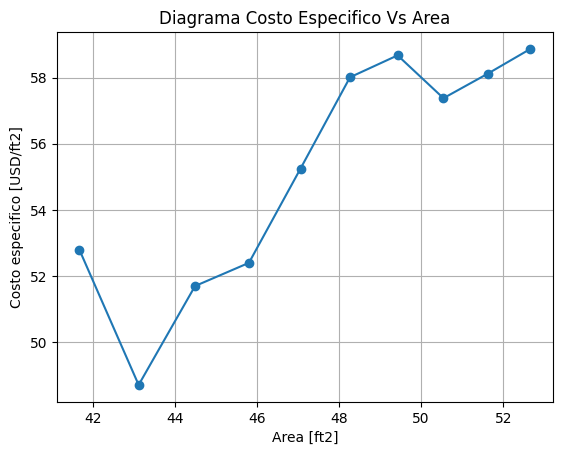

In [ ]:
plt.plot(
    data['area'],
    data['costo_intercambiador_especifico'],
    marker='o'
)
plt.xlabel('Area [ft2]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.title("Diagrama Costo Especifico Vs Area")
plt.grid(True)
plt.show()

In [ ]:
# Define the power law function
def power_law(x, A, B):
    return A * (x ** B)

In [ ]:
# Perform curve fitting to find A and B
params, covariance = curve_fit(
    power_law, 
    data['area'].to_numpy(),
    data["costo_intercambiador_especifico"].to_numpy()
)

In [ ]:
# Extract the values of A and B
K, n = params

m = 1 + n
print("k =", K)
print("m =", m)
print("n =", n)

k = 3.2931097501375857
m = 1.7304197426067336
n = 0.7304197426067336


In [ ]:
data['costo_prediccion'] =  K * (data['area'] ** (m))
data.head()

,area,costo_intercambiador,temperatura,costo_intercambiador_especifico,costo_prediccion
0,52.660691,3100,35,58.867438,3136.898961
1,51.620256,3000,36,58.116721,3030.428297
2,50.543195,2900,37,57.376665,2921.848997
3,49.426603,2900,38,58.672857,2811.055016
4,48.267190,2800,39,58.010421,2697.931345


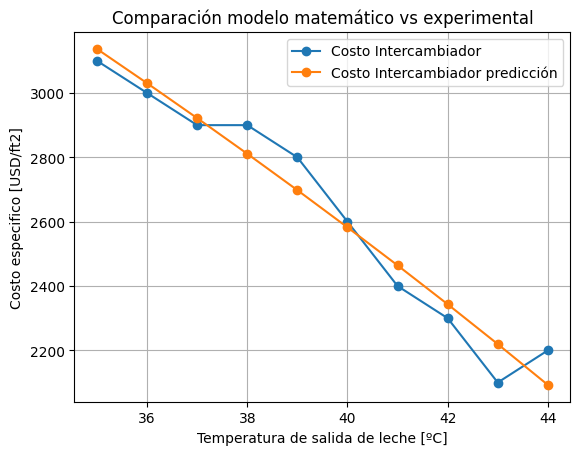

In [ ]:
plt.plot(
    data['temperatura'],
    data['costo_intercambiador'],
    marker='o',
    label='Costo Intercambiador'
)

plt.plot(
    data['temperatura'],
    data['costo_prediccion'],
    marker='o',
    label='Costo Intercambiador predicción'
)

plt.xlabel('Temperatura de salida de leche [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.title("Comparación modelo matemático vs experimental")
plt.legend()
plt.grid()
plt.show()

## 5. Costo energético

In [ ]:
n = 5 # 5 añoS
g = 0.08
i = 0.2 

PSA = (
    1 - ((1 + g) / (1 + i)) ** n
) / (i - g)
PSA

3.4125833333333295

In [ ]:
calor_adicional = calores_transferencia - calores_lmtd
horas = 300 * 24
CEE = 0.25

C_q = calor_adicional * horas * CEE * PSA / 1000
C_q

array([275744.57290667, 269616.91573097, 263489.25855526, 257361.60137956,
       251233.94420385, 245106.28702815, 238978.62985245, 232850.97267674,
       226723.31550104, 220595.65832534, 214468.00114963, 208340.34397393,
       202212.68679822, 196085.02962252, 189957.37244682, 183829.71527111,
       177702.05809541, 171574.40091971, 165446.743744  , 159319.0865683 ])

In [ ]:
costo_intercambiador = calor_adicional + C_q
costo_intercambiador

array([320634.73804821, 313509.52164714, 306384.30524606, 299259.08884499,
       292133.87244392, 285008.65604285, 277883.43964178, 270758.22324071,
       263633.00683964, 256507.79043857, 249382.57403749, 242257.35763642,
       235132.14123535, 228006.92483428, 220881.70843321, 213756.49203214,
       206631.27563107, 199506.05923   , 192380.84282892, 185255.62642785])

In [ ]:
data['costo_intercambiador_total'] = costo_intercambiador[::2]

## 6. Calculo  Ciclo refrigerador

<!-- <p align="center">
  <img src="ciclo_refrigerador.jpg" height ="300px">
</p> -->

![](ciclo_refrigerador.jpg)

### 6.1 Costo del refrigerador

$$ \dot{Q} = (\dot{m} *C_{p})_{leche} * (T_{entrada} -T_{salida})$$

In [ ]:
calor_refrigerador = caudal_leche * cp_leche_kern * (temperatura_estimada_salida_leche - temperatura_salida_leche)
print(f"Calor transmitido al refrigerador {calor_refrigerador} W")

Calor transmitido al refrigerador 68250.0 W


In [ ]:
calores_refrigerador = caudal_leche * cp_leche_kern * (data['temperatura'] - temperatura_salida_leche)
print(f"Calor transmitido al refrigerador {calores_refrigerador} W")

calores_refrigerador_ingles = calores_refrigerador * 3.41214 / 1e6
print(f"Calor transmitido al refrigerador {calores_refrigerador_ingles} M Btu/h")

Calor transmitido al refrigerador 0    48750.0
1    50700.0
2    52650.0
3    54600.0
4    56550.0
5    58500.0
6    60450.0
7    62400.0
8    64350.0
9    66300.0
Name: temperatura, dtype: float64 W
Calor transmitido al refrigerador 0    0.166342
1    0.172995
2    0.179649
3    0.186303
4    0.192957
5    0.199610
6    0.206264
7    0.212918
8    0.219571
9    0.226225
Name: temperatura, dtype: float64 M Btu/h


In [ ]:
data['costo_refrigeradores'] = [
    48000,
    49300,
    50600,
    51900,
    53200,
    54500,
    55700,
    57000,
    58200,
    59400,
]

### 6.2 Costo Compresor

In [ ]:
COP = 2 # Refrigeración

In [ ]:
trabajo_compresor = COP * calor_refrigerador
print(f"Trabajo del compresor \n {trabajo_compresor} W")

Trabajo del compresor 
 136500.0 W


In [ ]:
trabajo_compresores = COP * calores_refrigerador_ingles
print(f"Trabajos del compresor \n {trabajo_compresores} W")

trabajo_compresores_hp = trabajo_compresores / 745.7
print(f"Trabajos del compresor \n {trabajo_compresores_hp} Hp")

Trabajos del compresor 
 0    0.332684
1    0.345991
2    0.359298
3    0.372606
4    0.385913
5    0.399220
6    0.412528
7    0.425835
8    0.439142
9    0.452450
Name: temperatura, dtype: float64 W
Trabajos del compresor 
 0    0.000446
1    0.000464
2    0.000482
3    0.000500
4    0.000518
5    0.000535
6    0.000553
7    0.000571
8    0.000589
9    0.000607
Name: temperatura, dtype: float64 Hp


In [ ]:
data['costo_compresor'] = [
    78500,
    79600,
    80600,
    81700,
    82800,
    83900,
    85000,
    86100,
    87200,
    88300,
]

In [ ]:
data['costo_total_sistema'] = data['costo_refrigeradores']  + data['costo_intercambiador_total'] + data['costo_compresor']

In [ ]:
data.to_excel('data.xlsx')

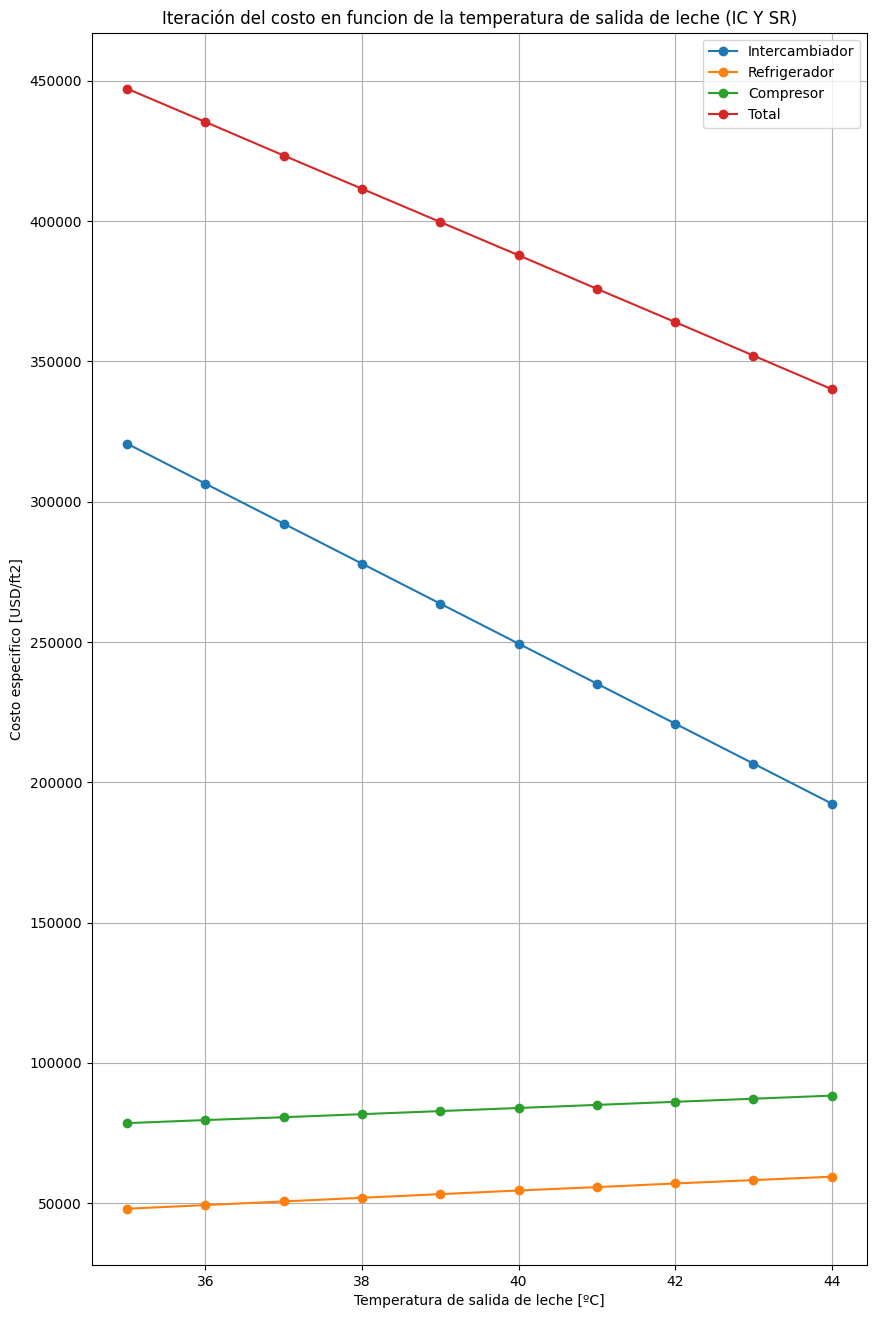

In [ ]:
plt.figure(figsize=(10,16))

plt.plot(
    data['temperatura'],
    data['costo_intercambiador_total'],
    marker='o',
    label='Intercambiador'
)

plt.plot(
    data['temperatura'],
    data['costo_refrigeradores'],
    marker='o',
    label='Refrigerador'
)

plt.plot(
    data['temperatura'],
    data['costo_compresor'],
    marker='o',
    label='Compresor'
)

plt.plot(
    data['temperatura'],
    data['costo_total_sistema'],
    marker='o',
    label='Total'
)

plt.xlabel('Temperatura de salida de leche [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')

plt.title('Iteración del costo en funcion de la temperatura de salida de leche (IC Y SR)')
plt.legend()
plt.grid()
plt.show()

# - Diseño solo sistema refrigerador 

## 1. Refrigerador

In [ ]:
calor_refrigerador = caudal_leche * cp_leche_kern * (temperatura_entrada_leche - temperatura_salida_leche)
print(f"Calor transmitido al refrigerador {calor_refrigerador} W")

Calor transmitido al refrigerador 136500.0 W


In [ ]:
calor_refrigerador_ingles = calor_refrigerador    * 3.41214 / 1e6
print(f"Calor transmitido al refrigerador {calor_refrigerador_ingles} M Btu/h")

Calor transmitido al refrigerador 0.46575711 M Btu/h


In [ ]:
print(f"precio: 98200 USD")

precio: 98200 USD


## 2. Compresor

In [ ]:
trabajo_compresor = COP * calor_refrigerador
print(f"Trabajo del compresor \n {trabajo_compresor} W")

Trabajo del compresor 
 273000.0 W


In [ ]:
trabajo_compresor_hp = trabajo_compresor / 745.7
print(f"Trabajos del compresor \n {trabajo_compresor_hp} Hp")

Trabajos del compresor 
 366.0989674131688 Hp


In [ ]:
print("precio: 129000")

precio: 129000


# Referencias
- Abigail , O. (2023) Principales Productores de Café del Mundo en 2022, Statista. Available at: https://es.statista.com/estadisticas/600243/ranking-de-los-principales-productores-de-cafe-a-nivel-mundial/#:~:text=Ranking%20de%20los%20principales%20productores%20de%20café%20a%20nivel%20mundial%20en%202022&amp;text=Brasil%20encabezó%20la%20clasificación%20mundial,kilogramos%20durante%20el%20año%20referido. (Accessed: 27 October 2023). 
- Seguros, V. (2021) Presión del Agua en Casa: Problemas habituales: Blog Verti, Verti Blog. Available at: https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra. (Accessed: 13 October 2023). 
- Bell, I.H. et al. (2014) ‘Pure and pseudo-pure fluid thermophysical property evaluation and the open-source Thermophysical Property Library coolprop’, Industrial &amp;amp; Engineering Chemistry Research, 53(6), pp. 2498–2508. doi:10.1021/ie4033999. 